In [60]:
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import sklearn.metrics as metrics
from preprocessing import smile_to_df
import matplotlib.pyplot as plt
import csv


In [61]:
#input all relevant csv's 
df1, _ = smile_to_df('tested_molecules-1.csv')
df2, _ = smile_to_df('tested_molecules_v2.csv')
df_test,original_df =  smile_to_df('untested_molecules.csv')
df1.set_index('ALDH1_inhibition', inplace=True)
df2.set_index('ALDH1_inhibition', inplace=True)
#both training datasets are combined
df = pd.concat([df1, df2])


In [62]:
#store smiles of untested molecules in index_test
index_test = pd.DataFrame({'Index': df_test.index.values})
#store unaltered tested dataset, for evaluation purposes
orig_df_test = df_test
df_test = df_test.reset_index(drop=True)

print(index_test.head())
print(index_test.iloc[0])

                                                     Index
0              CCCCC/C(=N\NC(=O)CCC(=O)NCc1ccccc1)c1ccccc1
1  Cc1ccc(S(=O)(=O)N2CCC(C(=O)OCC(=O)N3CCc4ccccc43)CC2)cc1
2    COc1ccc(N2C(=O)CC(Nc3ccc(F)cc3)C2=O)c([N+](=O)[O-])c1
3  Cc1cc(C)cc(OCC(=O)O[NH+]=C(N)Cc2ccc([N+](=O)[O-])cc2)c1
4                  NNC(=O)C=C1CCN(c2ncc(C(F)(F)F)cc2Cl)CC1
Index    CCCCC/C(=N\NC(=O)CCC(=O)NCc1ccccc1)c1ccccc1
Name: 0, dtype: object


In [63]:
df_filtered= df.reset_index()
#get label dataframe
y = df_filtered.iloc[:,0]
#get all features
X = df_filtered.loc[:, df_filtered.columns != 'ALDH1_inhibition']

In [64]:
#create training set, validation set and test set 0.8:0.1:0.1 division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size =0.5, random_state=1)

In [65]:

#join training features and labels for autogluon
train_set = pd.concat([X_train, y_train], axis=1)
#get label column name
label = 'ALDH1_inhibition'
#run algorithms on training set
predictor = TabularPredictor(label=label, eval_metric='precision').fit(train_set)
val_set =  pd.concat([X_val, y_val], axis=1)
#shows leaderboard of all algorithms
predictor.leaderboard(val_set, silent=True)

No path specified. Models will be saved in: "AutogluonModels\ag-20230615_120027\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230615_120027\"
AutoGluon Version:  0.6.2
Python Version:     3.7.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Train Data Rows:    1600
Train Data Columns: 208
Label Column: ALDH1_inhibition
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    5422.8 MB
	Train Data (Original)  Memory Usage: 

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM,1.000000,1.000000,0.007110,0.009505,0.795547,0.007110,0.009505,0.795547,1,True,4
1,LightGBMXT,1.000000,1.000000,0.008638,0.008998,0.668709,0.008638,0.008998,0.668709,1,True,3
2,LightGBMLarge,1.000000,0.979167,0.010021,0.010128,2.410111,0.010021,0.010128,2.410111,1,True,13
3,WeightedEnsemble_L2,1.000000,1.000000,0.013645,0.008998,1.357625,0.005007,0.000000,0.688916,2,True,14
4,CatBoost,0.945946,0.915254,0.008830,0.010041,3.149652,0.008830,0.010041,3.149652,1,True,7
5,RandomForestEntr,0.941176,0.852459,0.150365,0.110943,0.438434,0.150365,0.110943,0.438434,1,True,6
6,NeuralNetTorch,0.918919,0.843750,0.054608,0.040089,1.950061,0.054608,0.040089,1.950061,1,True,12
7,RandomForestGini,0.914286,0.885246,0.130028,0.111075,0.455054,0.130028,0.111075,0.455054,1,True,5
8,ExtraTreesGini,0.911765,0.887097,0.139019,0.111306,0.436438,0.139019,0.111306,0.436438,1,True,8
9,XGBoost,0.891892,0.851351,0.024229,0.005016,1.772512,0.024229,0.005016,1.772512,1,True,11


In [105]:
#select model
predictor.delete_models(models_to_keep='CatBoost', dry_run=False) 
#run and evaluate selected model on self-made test set
test_set =  pd.concat([X_test, y_test], axis=1)
y_true = test_set[label] 
y_pred = predictor.predict(test_set)  
print(confusion_matrix(y_true, y_pred))

Confusion matrix is  [[137   6]
 [ 31  26]]


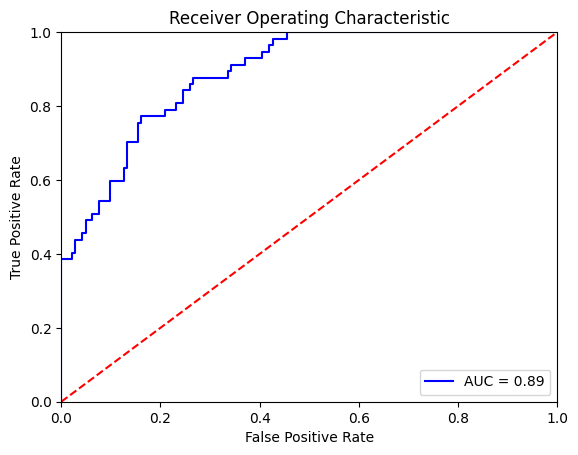

In [67]:
#print roc curve selected model on test set
probs = predictor.predict_proba(test_set)
preds = probs[1]
fpr, tpr, threshold = metrics.roc_curve(test_set[label], preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [68]:
def probs_to_csv(probs,original_data):
    '''
    Input: 
        probs[pandas Series]: raw prediciton values for positive classification
        original_data[pandas Dataframe]: original dataset
    Output: 
        csv file with 100 best molecules
    '''
    sorted_probs = probs.sort_values(ascending=False)
    #get best 100 molecules indices
    best_100_indices = sorted_probs.index[0:100]
    
    #get string molecule of every molecule index
    smiles = []
    for i in best_100_indices:
        smiles.append(original_data.iloc[i].item())
    #output csv file
    with open('output.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        for item in smiles:
            writer.writerow([item])


In [104]:
# run model on untested molecules set
probs = predictor.predict_proba(df_test)
preds = probs[1]
# build output csv best 100 probabilities
probs_to_csv(probs[1], index_test)


#check if smile is consistent with input dataframe and postprocessing dataframe
print("Value index in index dataset is",index_test.iloc[preds.argmax()].item())
print("Value index in original dataset is",orig_df_test.iloc[preds.argmax()].name)
#check whether index of the outcome probabilities matches the index of the input dataset
probs_sorted = probs[1].sort_values(ascending=False)
test_prob = predictor.predict_proba(df_test.iloc[probs_sorted.index[0]:probs_sorted.index[0]+1])
print(test_prob[1].item())
print(probs[1].max())

#threshold is based on worst confidence of best 100 of the test dataset
#this way, the expected performance of the unseen dataset can be estimated using the test dataset
threshold = preds.sort_values(ascending=False).iloc[100]

#tproduce evaluation metrics on self-made test dataset
probs = predictor.predict_proba(X_test)
preds = probs[1]
preds = preds > threshold
precision = precision_score(y_test, preds)
print("Threshold is", threshold)
print("Precision above threshold is", precision*100, "%")


Value index in index dataset is CC(=O)OC1CC2C(C)(C)C(=O)C3OC3[C@]2(C)C2CC[C@@]3(C)C(c4ccoc4)OC(=O)C4OC43[C@]12C
Value index in original dataset is CC(=O)OC1CC2C(C)(C)C(=O)C3OC3[C@]2(C)C2CC[C@@]3(C)C(c4ccoc4)OC(=O)C4OC43[C@]12C
0.921744704246521
0.921744704246521
Threshold is 0.8407149910926819
Precision above threshold is 100.0 %
